In [3]:
#Importing initial dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Loading data
df=pd.read_csv('Resources/Household energy bill data.csv')

In [5]:
df.shape

(1000, 10)

In [6]:
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [7]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [8]:
#Checking for null values
df.isnull().sum()

num_rooms             0
num_people            0
housearea             0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
is_urban              0
amount_paid           0
dtype: int64

In [9]:
#Viewing summary statistics
df.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


In [10]:
#Viewing correlations of variables
df.corr()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
num_rooms,1.000000,-0.005765,-0.033561,0.018620,-0.016146,0.004133,-0.000345,-0.037474,-0.015705,-0.023933
num_people,-0.005765,1.000000,0.000072,0.033672,0.020101,0.012104,0.019152,-0.010656,-0.023863,0.053501
housearea,-0.033561,0.000072,1.000000,0.036039,0.088323,0.007986,-0.042645,0.038699,0.024902,0.096157
is_ac,0.018620,0.033672,0.036039,1.000000,-0.000247,0.002678,-0.014054,-0.027256,-0.053317,0.390003
is_tv,-0.016146,0.020101,0.088323,-0.000247,1.000000,-0.028155,0.013664,0.015353,0.034774,0.197613
is_flat,0.004133,0.012104,0.007986,0.002678,-0.028155,1.000000,-0.014879,-0.028315,-0.000066,0.147927
ave_monthly_income,-0.000345,0.019152,-0.042645,-0.014054,0.013664,-0.014879,1.000000,0.008329,-0.039424,0.025889
num_children,-0.037474,-0.010656,0.038699,-0.027256,0.015353,-0.028315,0.008329,1.000000,-0.007511,0.447512
is_urban,-0.015705,-0.023863,0.024902,-0.053317,0.034774,-0.000066,-0.039424,-0.007511,1.000000,0.649568
amount_paid,-0.023933,0.053501,0.096157,0.390003,0.197613,0.147927,0.025889,0.447512,0.649568,1.000000


In [11]:
#Renaming columns
df = df.rename(columns={"num_rooms":"rooms", "num_people":"people", "housearea": "home_area (m^2)", "is_ac": "is_airconditioning_used",\
                        "is_tv": "is_electronics_used", "is_flat": "is_apartment", "ave_monthly_income":"avg_monthly_income (Rs)", "num_children":"children"\
                        , "is_urban": "is_city", "amount_paid": "electricity_bill (Rs)"})

In [12]:
df.head()

,rooms,people,home_area (m^2),is_airconditioning_used,is_electronics_used,is_apartment,avg_monthly_income (Rs),children,is_city,electricity_bill (Rs)
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [13]:
import seaborn as sns

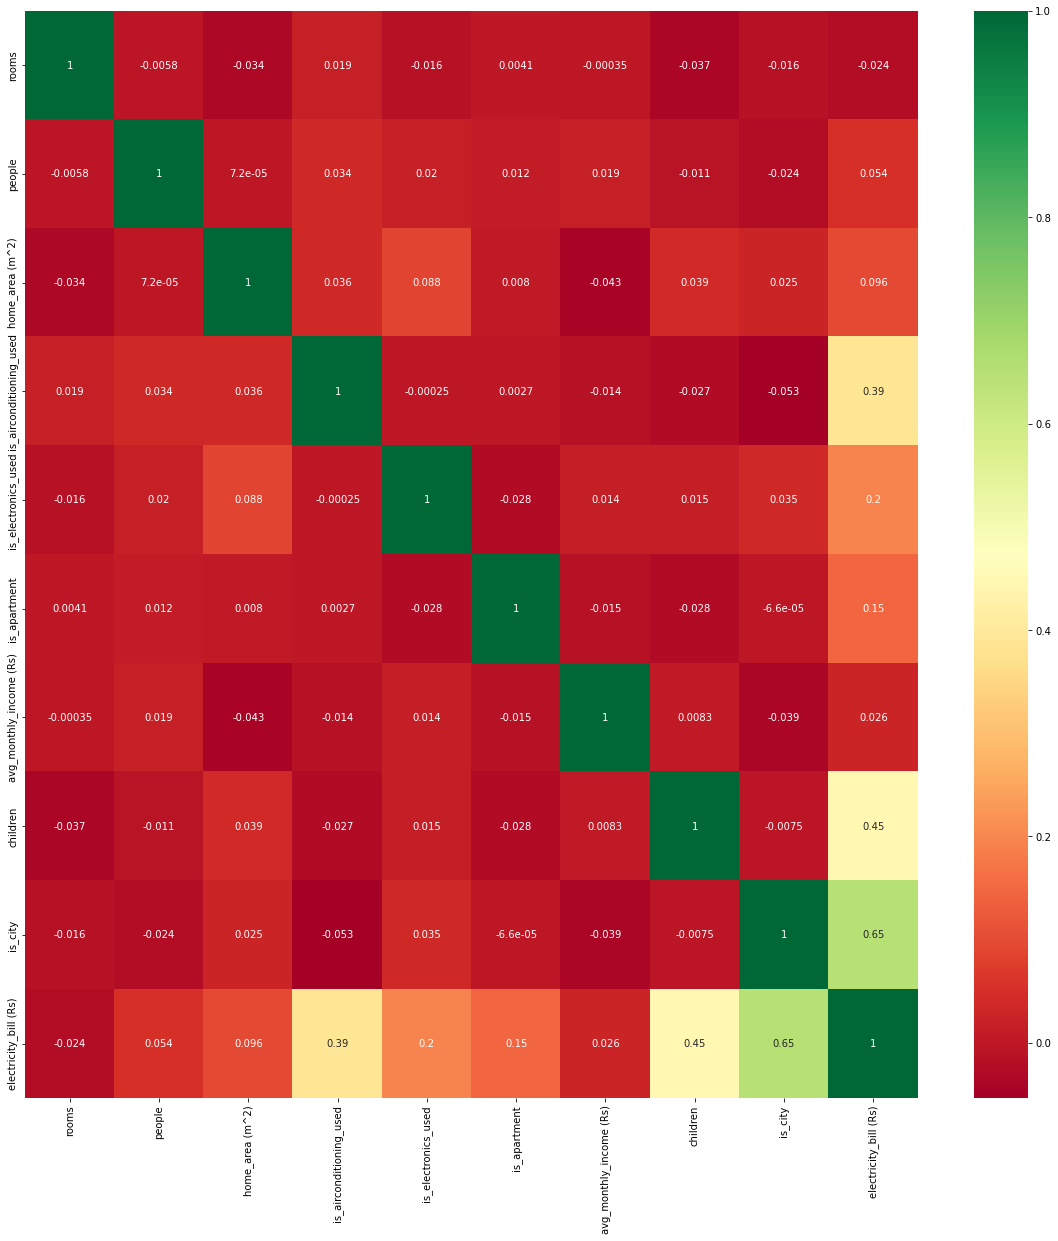

In [14]:
#Viewing correlations of variables in a heatmap
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
#Creating dependent and independent variables
X = df.drop("electricity_bill (Rs)", axis=1)
y = df["electricity_bill (Rs)"]

In [16]:
X.head()

,rooms,people,home_area (m^2),is_airconditioning_used,is_electronics_used,is_apartment,avg_monthly_income (Rs),children,is_city
0,3,3,742.57,1,1,1,9675.93,2,0
1,1,5,952.99,0,1,0,35064.79,1,1
2,3,1,761.44,1,1,1,22292.44,0,0
3,0,5,861.32,1,1,0,12139.08,0,0
4,1,8,731.61,0,1,0,17230.10,2,1


In [17]:
y

0      560.481447
1      633.283679
2      511.879157
3      332.992035
4      658.285625
          ...    
995    655.870111
996    354.472693
997    568.660550
998    653.423314
999    537.801005
Name: electricity_bill (Rs), Length: 1000, dtype: float64

In [18]:
#Importing machine learning models from sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

In [19]:
#Python function to test different models
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()  

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [21]:
test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.8840138198611993
Test Score: 0.8678284931129662

Model: KNeighborsRegressor
Train score: 0.8721549499821071
Test Score: 0.8140602776341819

Model: RandomForestRegressor
Train score: 0.9782815157041266
Test Score: 0.8481841793178448

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.8413426283785113

Model: AdaBoostRegressor
Train score: 0.8356330333253845
Test Score: 0.8076130581147619

Model: SVR
Train score: 0.19712702835199492
Test Score: 0.19122420762595216



In [22]:
#Feature Importance
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:

print(model.feature_importances_)


[0.01998229 0.02942884 0.03444058 0.18166937 0.03136138 0.02824844
 0.03601104 0.21691938 0.42193869]


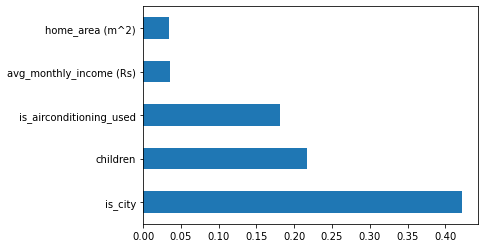

In [24]:
#Graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [26]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [27]:
# Creating hyperparameters
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [28]:
# Use the random grid to search for best hyperparameters for RandomForestRegressor model
rf = RandomForestRegressor()

In [29]:

# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [30]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
#Getting best paramaters for the Random Forest model
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [32]:
#Entering best params into RandomForestRegressor model
rf_best = RandomForestRegressor(n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=20)

In [33]:
clf = rf_best.fit(X_train, y_train)

In [34]:
#RandomForestRegressor score with optimal parameters
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9158942282747804
Testing Score: 0.8413786475645496


In [40]:
#ExtraTreesRegressor model
et = ExtraTreesRegressor()

In [41]:
et_random = RandomizedSearchCV(estimator = et, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
#Best params for ExtraTrees model
et_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [44]:
et_best = ExtraTreesRegressor(n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features='auto', max_depth=15)

In [45]:
clf2 = et_best.fit(X_train, y_train)

In [46]:
#ExtraTreesRegressor score with optimal parameters
print(f'Training Score: {clf2.score(X_train, y_train)}')
print(f'Testing Score: {clf2.score(X_test, y_test)}')

Training Score: 0.9026832973230412
Testing Score: 0.855697786759971


In [47]:
#Linear regression model
lin = LinearRegression().fit(X_train_scaled, y_train)

In [48]:
print(f'Train score: {lin.score(X_train_scaled, y_train)}')
print(f'Test Score: {lin.score(X_test_scaled, y_test)}\n')

Train score: 0.8840138198611993
Test Score: 0.8678284931129662



In [56]:
#Getting predictions for ExtraTrees model
predictions=et_random.predict(X_test)

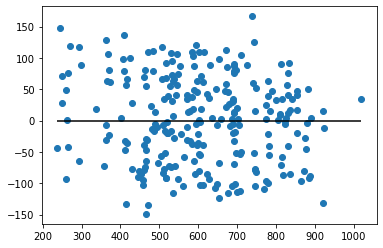

In [57]:
#Scatter plot to observe differences between predicted and actual values
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [59]:
#Importing metrics
from sklearn import metrics

In [61]:
#Looking at error statistics for predictions
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 58.23366667126738
MSE: 4776.363124948663
RMSE: 69.11123732757693


In [49]:
#Adding predictions from ExtraTreesRegressor model to original dataframe
y_hats = et_random.predict(X)

In [50]:
df['electricity_bill_prediction'] = y_hats

In [54]:
df

,rooms,people,home_area (m^2),is_airconditioning_used,is_electronics_used,is_apartment,avg_monthly_income (Rs),children,is_city,electricity_bill (Rs),electricity_bill_prediction
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447,672.317529
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679,662.607633
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157,464.663314
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035,407.891677
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625,687.965405
...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111,602.523443
996,2,5,847.97,0,1,0,39502.92,0,0,354.472693,260.620014
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550,626.360807
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314,562.905213


In [52]:
import pickle
# Creating a file to store model data
file = open('extra_trees_regression_model.pkl', 'wb')

# Dumping information to that file
pickle.dump(et_random, file)

In [53]:
df.to_csv("Resources/Household_energy_bill_data_cleaned.csv")